In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sc
import random
import math
plt.style.use(['dark_background'])

In [304]:
# bandit_dists_mean = [-2,-1,0,1,2,3,4,5,8,12,15,20]
# bandits_dist_std = [0,0.5,1,1.5,2,2.5,3,5,8,10,15,20]
# norm = [0,1,2,3,1,1,6,10,10]
# std = [1,1,1,1,3,4,3,4,1,10]

class MAB:
    
    def __init__(self):
        k = 10
        self.k = k
        self.qgrid = np.zeros(shape=k)
        self.time = 0
        self.past_action = [0]
        self.past_reward = [0]
        self.initNorms()
        self.cumsum = [0]
        
        
    
    def initNorms(self):
        bandit_norm_arr = []
        bandits_arr = []
        for i in range(self.k):
            bandit_norm_arr.append(np.random.normal(0,1))
            indiv_bandit = []
            bandits_arr.append(indiv_bandit)
        self.norm = bandit_norm_arr
        self.bandits_past = bandits_arr
        
    def reward(self,bandit_num):
        return np.random.normal(self.norm[bandit_num],1)
        
    def action(self,method ,e,a,c):
        action_to_take = -1
        if method == 'greedy':
            if self.time == 0:
                self.qgrid = [self.q for i in range(10)]
            action_to_take = np.argmax(self.qgrid)
        if method =='egreedy':
            rand = random.randint(1,100)
            if rand<=((1-e)*100):
                action_to_take = np.argmax(self.qgrid)
            else :
                action_to_take = random.choice([i for i in range(self.k -1)])
        if method == 'UCB':
            ucb = []
            if self.time == 0:
                self.time = 1
            for i in range(self.k):
                x = self.qgrid[i] + c*math.sqrt((math.log(self.time))/(len(self.bandits_past[i])+1))
                ucb.append(x)
            action_to_take = np.argmax(np.array(ucb))
        self.update(action_to_take,self.reward(action_to_take),a)
        
            
        
    def update(self,bandit_num,reward,a):
        self.bandits_past[bandit_num].append(reward)
        if a == 2:
            self.qgrid[bandit_num] = self.qgrid[bandit_num] + np.array((reward - self.qgrid[bandit_num])).mean()
        else:
            self.qgrid[bandit_num] = self.qgrid[bandit_num] + a*(reward - self.qgrid[bandit_num])
        self.past_reward.append(reward)
        self.past_action.append(bandit_num)
        self.cumsum.append(self.cumsum[-1] + reward)
        self.time += 1
        
    def run(self,iters,method,e,a,c=0,q = 5):
        self.q = q
        for i in range(iters):
            self.action(method ,e,a,c)
        self.df = pd.DataFrame(columns = ['cumsum','action','reward'])
        self.df['cumsum'] = self.cumsum
        self.df['action'] = self.past_action
        self.df['reward'] = self.past_reward
        return self.df

In [302]:
agent = MAB()
greedy = agent.run(iters = 1000, method = 'greedy',e = 0,a = 0.1)
for i in range(100):
    agent = MAB()
    greedy_df = agent.run(iters = 1000, method = 'greedy',e = 0,a = 0.1)
    greedy = greedy_df+greedy
greedy['cumsum'] = greedy['cumsum']/101
greedy['reward'] = greedy['reward']/101

# agent1 = MAB()
# greedy1 = agent.run(iters = 1000, method = 'greedy',e = 0,a = 2)
# for i in range(100):
#     agent1 = MAB()
#     greedy_df = agent1.run(iters = 1000, method = 'greedy',e = 0,a = 2)
#     greedy1 = greedy_df+greedy1
# greedy1['cumsum'] = greedy1['cumsum']/101
# greedy1['reward'] = greedy1['reward']/101


e_agent = MAB()
e_greedy = e_agent.run(iters = 1000, method = 'egreedy',e = 0.1,a = 0.1)
for i in range(100):
    e_agent = MAB()
    e_greedy_df = e_agent.run(iters = 1000, method = 'egreedy',e = 0.1,a = 0.1)
    e_greedy = e_greedy_df+e_greedy
e_greedy['cumsum'] = e_greedy['cumsum']/101
e_greedy['reward'] = e_greedy['reward']/101


ucb_agent = MAB()
ucb_greedy = ucb_agent.run(iters = 1000, method = 'UCB',e = 0.1,a = 0.1,c = 2)
for i in range(100):
    ucb_agent = MAB()
    ucb_greedy_df = ucb_agent.run(iters = 1000, method = 'UCB',e = 0.1,a = 0.1,c = 2)
    ucb_greedy = ucb_greedy_df+ucb_greedy
ucb_greedy['cumsum'] = ucb_greedy['cumsum']/101
ucb_greedy['reward'] = ucb_greedy['reward']/101

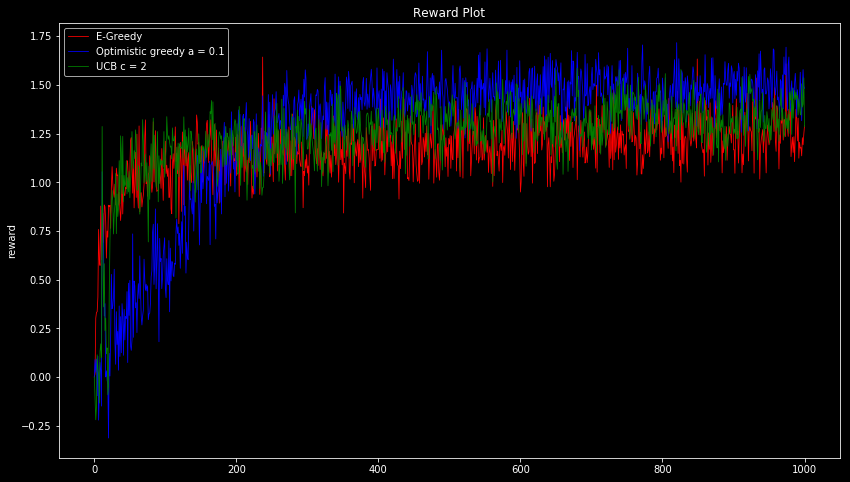

In [303]:
plt.figure(figsize = (14,8))
sns.lineplot(y= e_greedy['reward'] , x = e_greedy.index,color = 'red',label = 'E-Greedy',linewidth = 0.8).set_title('Reward Plot')
sns.lineplot(y= greedy['reward'] , x = greedy.index,color = 'blue',label = 'Optimistic greedy a = 0.1',linewidth = 0.8)
sns.lineplot(y= ucb_greedy['reward'] , x = ucb_greedy.index,color = 'green',label = 'UCB c = 2',linewidth = 0.8)

## Greedy

In [308]:
q_summ = []
reward = 0
for q in [0,1,2,3,4,5,6,7,8,9,10]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'greedy',e = 0,a = 0.1,q = q)
    q_summ.append([q,df.reward.mean()+reward])
print(q_summ)

a_summ = []
reward = 0
for a in [0,1,2,3,4,5,6,7,8,9,10]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'greedy',e = 0,a = a/10,q = 5)
    a_summ.append([a/10,df.reward.mean()+reward])
print(a_summ)



[[0, 1.4845213140957887], [1, 2.191187091437862], [2, 2.1248363648708146], [3, 1.2037218982456421], [4, 2.70623699601876], [5, 1.3485553262004892], [6, 0.9515551512830843], [7, 0.9472854028839942], [8, 0.0716483439205106], [9, 0.14795953943083062], [10, 2.8356304745760212]]
[[0.0, 0.20230686970390463], [0.1, 1.2987113821008038], [0.2, 0.9232679465220316], [0.3, 1.3205124605160057], [0.4, 1.0584613384305308], [0.5, 1.9409686655026492], [0.6, 0.5813551061219686], [0.7, 1.3893623337813708], [0.8, 0.7005124105155933], [0.9, 0.62994475788857], [1.0, 0.7769055269620452]]


## e-Greedy

In [311]:
e_summ = []
reward = 0
for e in [0,1,2,3,4,5,6,7,8,9,10]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'egreedy',e =e/10,a = 0.1,q = 5)
    e_summ.append([e/10,df.reward.mean()+reward])
print(e_summ)

a_summ_e = []
reward = 0
for a in [0,1,2,3,4,5,6,7,8,9,10]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'egreedy',e = 0.1,a = a/10,q = 5)
    a_summ_e.append([a/10,df.reward.mean()+reward])
print(a_summ_e)



[[0.0, 2.3583340353253317], [0.1, 0.5230803696880677], [0.2, 1.6313772401659874], [0.3, 1.839660233585406], [0.4, 0.3332292248334151], [0.5, 0.8717426024337454], [0.6, 0.33193675204617934], [0.7, 0.057594966912417236], [0.8, -0.48698382743848123], [0.9, 0.0645796359791956], [1.0, -0.4887157044533598]]
[[0.0, 0.3506968579494377], [0.1, 0.7964573636256465], [0.2, 0.9659239285038715], [0.3, 1.5920019717166907], [0.4, 2.463061829153829], [0.5, 2.270238006853535], [0.6, 2.6229064545270693], [0.7, 0.7008502836575125], [0.8, 0.7002153674920117], [0.9, 0.8983348543960773], [1.0, 1.634876335442865]]


## UCB

In [312]:
c_summ = []
reward = 0
for c in [0,0.25,0.5,1,1.25,1.5,1.75,2,2.25,2.5,3,5]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'UCB',e =0.1,a = 0.1,q = 5,c = c)
    c_summ.append([c,df.reward.mean()+reward])
print(c_summ)

a_summ_ucb = []
reward = 0
for a in [0,1,2,3,4,5,6,7,8,9,10]:
    mab = MAB()
    df = mab.run(iters = 1000, method = 'UCB',e = 0.1,a = a/10,q = 5)
    a_summ_ucb.append([a/10,df.reward.mean()+reward])
print(a_summ_ucb)


[[0, 0.7159026616198468], [0.25, 1.1187706062186002], [0.5, 0.05715207515214908], [1, 1.7160104622470502], [1.25, 2.0151085582540733], [1.5, 1.1119625728864708], [1.75, 0.7401901632624901], [2, 2.937056148560827], [2.25, 0.4305731258457479], [2.5, 0.7819506364426376], [3, 1.3868760109103972], [5, 0.8986426353666831]]
[[0.0, -0.15405109172759027], [0.1, 0.9340278024075014], [0.2, 1.6291698225860747], [0.3, 2.328062369619024], [0.4, 2.3347273237785613], [0.5, 1.4693141215031402], [0.6, 1.2421264434347024], [0.7, 2.1558621108969214], [0.8, 0.975154156193379], [0.9, 2.3462632453256766], [1.0, 1.1964596024317669]]


In [345]:
q_summ= pd.DataFrame(q_summ)
a_summ= pd.DataFrame(a_summ)

e_summ= pd.DataFrame(e_summ)
a_summ_e= pd.DataFrame(a_summ_e)

c_summ= pd.DataFrame(c_summ)
a_summ_ucb= pd.DataFrame(a_summ_ucb)

In [349]:
q_summ

,0,1
0,0,1.484521
1,1,2.191187
2,2,2.124836
3,3,1.203722
4,4,2.706237
5,5,1.348555
6,6,0.951555
7,7,0.947285
8,8,0.071648
9,9,0.147960


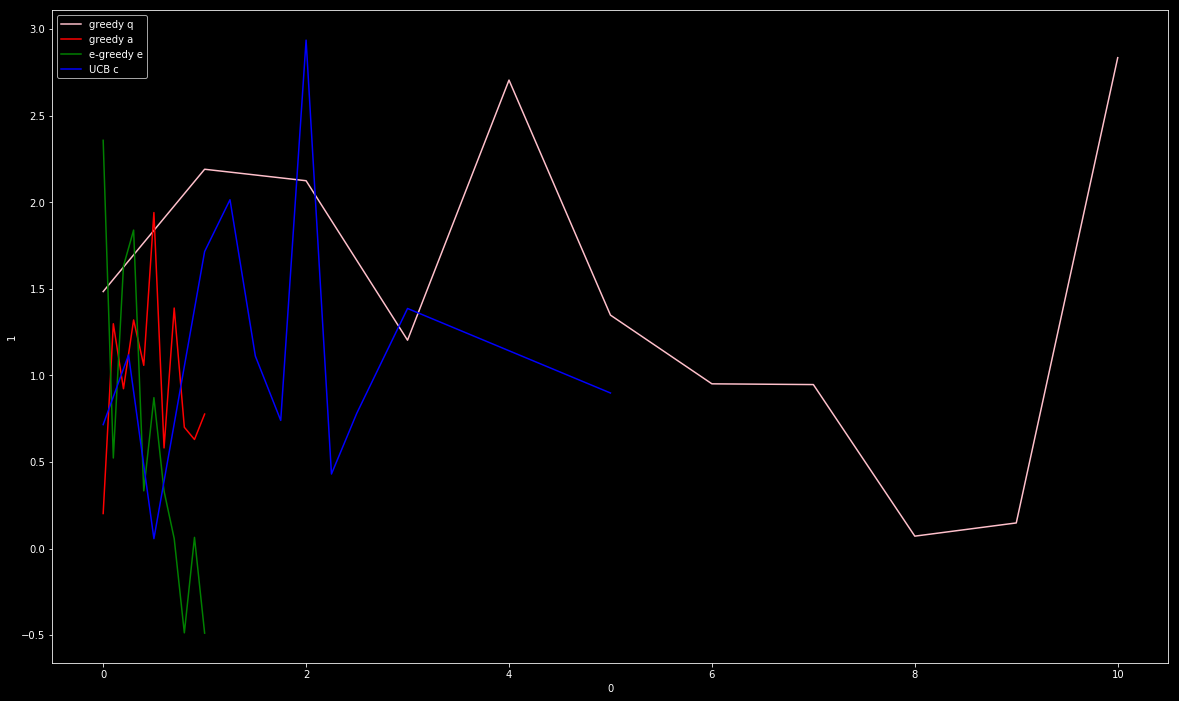

In [359]:
plt.figure(figsize = (20,12))
sns.lineplot(x = q_summ[0],y = q_summ[1],label = 'greedy q',color = 'pink')
sns.lineplot(x = a_summ[0],y = a_summ[1],label = 'greedy a',color = 'red')
sns.lineplot(x = e_summ[0],y = e_summ[1],label = 'e-greedy e',color = 'green')
sns.lineplot(x = c_summ[0],y = c_summ[1],label = 'UCB c',color = 'blue')
